# Homework 2

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Problem 1
1) Back in the day before calculator has square root function. People use the "divide and average" method to calculate $\sqrt{a}$ where $a$ is a postive number. The method goes

 - Start with a number $x_0$, then the next guess for $a$ can be obtained by

$\displaystyle
x_{n+1} = \frac{x_n + a/x_n}{2}
$

 - Then you repeat and keep making the next guess.


1.1) Calculate $\sqrt{17}$ using this method. Pick a sensible value for $x_0$ and do it for 5 iterations.

In [61]:
def div_and_avg(x, i): # x = number, i = iterations
    x_0 = 4 # a sensible number
    for n in range(i):
        x_0 = (x_0 + (x/x_0)) / 2
    return x_0

div_and_avg(17, 5)

4.123105625617661

1.2) Show that this method is equivalent to Newton's method. Hint find equation where the answer is sqrt.

In [17]:
def f(x):
    return x**2 - 17
def fp(x):
    return 2*x

def newton(f, fp, x, n): # f(x) = 0
    for i in range(n):
        x = x - (f(x) / fp(x))
    return x

newton(f, fp, 4, 5)

4.123105625617661

1.3) Find an equivalent formula for finding cube root ($\sqrt[3]{a}$)

$x_{n+1} =  H(x_n)$

Find $H(x_n)$

$$
H(x_n) \approx \frac{2x_n + \frac{a}{x_n^2}}{3}
$$



In [23]:
def cube_root(x, i): # x = number, i = iterations
    x_0 = 3 # a sensible number
    for n in range(i):
        x_0 = (2*x_0 + (x/x_0**2)) / 3
    return x_0

1.4) Use the above method to find $\sqrt[3]{17}$

In [22]:
cube_root(17, 10)

2.5712815906582356

## Problem 2

2.1) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)
$



### Solution
Rearrange,
$$
f'(x) - O(h^2) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h}
$$

Approximating the RHS via Taylor series yields, for each part:

$$
-f(x+2h) = -f(x) - f'(x)\cdot 2h - \frac{f''(x) \cdot (2h)^2}{2!} - \frac{f'''(x) \cdot (2h)^3}{3!} ...
\newline \approx -f(x) - f'(x) \cdot 2h - f''(x) \cdot 2h^2 - \frac{f'''(x) \cdot 8h^3}{3!}
$$

Second part:

$$
4 \cdot f(x+h) = 4 \cdot \left[f(x) + f'(x)h + \frac{f''(x)h^2}{2!} + \frac{f'''(x)h^3}{3!}\right]
$$

The third part should remain as is. Now, by expanding (but not yet dividing by $2h$)

$$
-f(x+2h)+4f(x+h)-3f(x) = 2h \cdot f'(x) - \left[f'''(x) \cdot \frac{2h^3}{3}\right]
$$

Now we divide,

$$
\frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} = f'(x) - \left[\frac{f'''(x)}{2} \cdot \frac{2h^2}{3}\right]
$$

Which ends up being:

$$
f'(x) - f'''(\xi) \cdot \frac{h^2}{3}
$$

Where we account for just the dominant term, giving us the end result of:

$$
f'(x) - O(h^2)
$$

2.2) Let $f(x) = xe^{-x}$. Use the formula in 4.1) to find the "first" derivative of $f(x)$ and plot the first derivative for $x \in [0,1]$. Pick appropriate value for $h$.

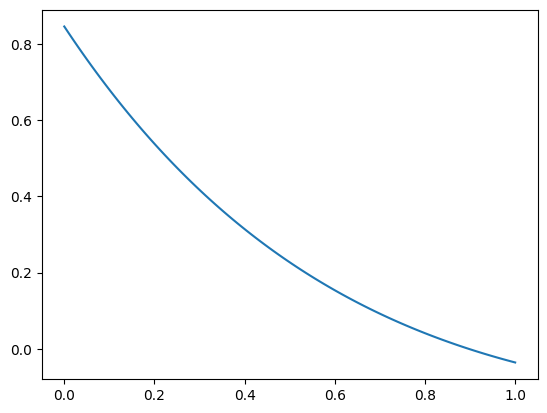

In [28]:
def f(x):
    return x * math.exp(-x)
def first_derivative(f, h):
    def ret(x):
        return ( (-f(x+2*h)) + (4*f(x+h)) - (3*f(x)) ) / (2*h)
    return ret

ffd = first_derivative(f, h=0.5)

xs = np.linspace(0,1,100)
ys = [ffd(x) for x in xs]

plt.plot(xs,ys)


2.3) Let $f(x) = xe^{-x}$. Use the formula in 4.2) to find the "second" derivative of $f(x)$ and plot the second derivative for $x \in [0,1]$

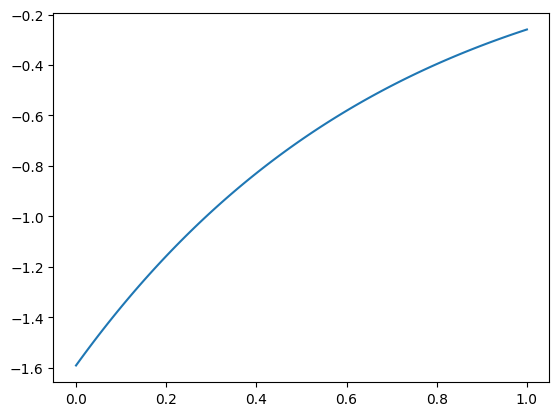

In [30]:
sdv = first_derivative(first_derivative(f, h=0.5), 0.5)

xs = np.linspace(0,1,100)
ys = [sdv(x) for x in xs]

plt.plot(xs,ys)

## Problem 3

Notice that $\tan(1) = \pi/4$ , this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

3.1) Find taylor expansion of $\arctan$ for 3 **non-zero** terms. If you forgot,
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

### Solution
Recalling that:
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

Let's expand the first few terms for f(x), where we will be doing the substitution later.

$$
f(x) = f(0) + f'(0) \cdot x + \frac{f''(0)}{2!} \cdot x^2 + \frac{f'''(0)}{3!} \cdot x^3 + \frac{f''''(0)}{4!} \cdot x^4
$$

Let's do the first few derivatives:
$$
f'(x) = \frac{1}{1+x^2}
$$
$$
f''(x) = \frac{-2x}{(1+x^2)^2}
$$
$$
f'''(x) = \frac{6x^2-2}{(1+x^2)^3}
$$

Therefore,
$$
arctan(x) \approx 0 + x + 0 - \frac{x^3}{3}
$$

Which still isn't enough so we do a few more derivatives:
$$
f^{4}(x)= \frac{-(24 x (-1 + x^2))}{(1 + x^2)^4}
$$
$$
f^{5}(x)= \frac{(24 (1 - 10 x^2 + 5 x^4))}{(1 + x^2)^5}
$$
It seems like the series alternates signs and values at certain degrees. I'll assume that for even degrees, the term will be 0. Therefore, let's try doing only $f^{5}(x)$

$$
f^{5}(0) = 24 \to \frac{24}{120} x^5 \to \frac{x^5}{5}
$$

So therefore, the first three terms of the series is:
$$
arctan(x) \approx x - \frac{x^3}{3} + \frac{x^5}{5}
$$

3.2) Guess the rest of the terms

### Solution
Per deduction,
$$
arctan(x) \approx x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \frac{x^9}{9} \pm ...
$$

3.3) Calculate $\pi$ using taylor approximation for 200 **non-zero** terms. (you must write some sort of for loop to do it).

In [52]:
def taylor_pi(x, n): # n: number of non-zero terms
    terms = 1
    sign = True
    degree = 3
    total = x
    
    while terms < n:
        temp = (x**degree) / degree
        if sign: # -
            total -= temp
            sign = False 
        elif not sign:
            total += temp
            sign = True
        degree += 2
        terms += 1

    return 4 * total

taylor_pi(1,200)
        

3.136592684838816

## Problem 4

4) The purpose of this problem is to make sure you know that the bound on $f^{(n+1)}(\xi)$ after all the cancellation is **NOT** necessarily 1 **NOR** does it have to look the same as the next term in the series.

4.1)Find the first 3 **non-zero** terms of Taylor series for
$$f(x) = \frac{1}{1-x}$$

### Solution
Recall the first few terms of the Taylor series for f(x) (generic)
$$
f(x) = f(0) + f'(0) \cdot x + \frac{f''(0)}{2!} \cdot x^2 + \frac{f'''(0)}{3!} \cdot x^3 + \frac{f''''(0)}{4!} \cdot x^4
$$

The first few derivatives of $f(x)$ are:
$$
f'(x) = \frac{1}{(1-x)^2}
f''(x) = \frac{2}{(1-x)^3}
f'''(x) = \frac{6}{(1-x)^4}
f^{4}(x) = \frac{24}{(1-x)^5}
f^{5}(x) = \frac{120}{(1-x)^6}
$$

Therefore, the first few terms are:
$$
f(x) \approx 1 + x + x^2
$$


4.2) If we estimate $$\frac{1}{0.8} = \frac{1}{1-0.2}$$ using the first 3 non-zero terms, what is the bound on the truncation error. Be careful about evaluating the bound for $f^{(n+1)}({\xi})$.

### Solution

The bound on the truncation error is the value of the fourth non-zero term of the Taylor series (so the one with $f^{3}(\xi)$, so $\frac{6}{3! \cdot (1-\xi)^4} \cdot x^3$ which simplifies to $\frac{x^3}{(1-\xi)^4}$

Realistically, the value we can use for $\xi$ should be $0.2$ as it is the largest possible bound. Therefore, knowing that $x = 0.2$ our final formula will be:

$$
\frac{0.2^3}{0.8^4} = 0.01953125 \approx 0.0195
$$

Where the bound on the trunctation error should be $\le 0.0195$

4.3) How many terms do we need to calculate $1/(1-0.2)$ such that the uncertainty is less than 10e-5.

We want to find when the truncation error is $\le 10^{-5}$ so we need to solve for $n$ (so we need to calculate $n-1$ terms) such that:

$$
\frac{f^{n}(\xi)}{n!} \cdot x^n = 10^{-5}
$$

The general formula for the $n^{th}$ degree derivative is:

$$
f^{n}(x) = \frac{n!}{(1-x)^{n+1}}
$$

So actually, the formula can be simplified to:

$$
\frac{x^n}{(1-x)^{n+1}} = 10^{-5}
$$

Substituting in $x = 0.2$ (as we know that), we get:

$$
\frac{0.2^n}{0.8^{n+1}} = 10^{-5}
$$

Now we solve. Note that we use log base 10.

$$
0.2^n = 10^{-5} \cdot 0.8^{n+1}
$$

$$
log(0.2^n) = log(10^-5) + log(0.8^{n+1})
$$

$$
nlog(0.2) = -5 + \left[nlog(0.8) + log(0.8)\right]
$$

$$
n(log(0.2) - log(0.8)) = -5 + log(0.8)
$$

$$
n \approx 8.465784285
$$

We ceil the answer, meaning that we need to calculate the ninth derivative. This means we need to calculate $9-1=8$ terms beforehand to get a truncation error bound of $\le 10^{-5}$

5) **It's me Luigi!!!** (If you aren't old enough to recognize this phrase https://www.youtube.com/watch?v=ZhadLMDWcGA)

The goal of this problem is to turn Mario(`mario.png`) into Luigi(`luigi.png`).

<img src="mario.png" style="display:inline; width:200px;"/>
<img src="luigi.png" style="display:inline; width:200px;"/>

If you can accomplish this by other algorithm, do it! you don't need to follow my guide. Just make a picture that looks like `luigi.png`. Depise having written a lengthy guide, I actually encourage you to *not* follow my guide, but to improvise and be creative. If you know what to do , you can do this in less than 20 lines.

### Luigination Guide

This problem will show you how to approach a seemingly impossible and wtf-ish problem.

When you read this guide, I want you to think not only about how to do it but how to figure out how to do it, which is way more important.

To accomplish the *Luigination* we need to do two things.

 1) Detect his cloth and hat which is defined by its *redness*.
 
 2) Changing the color from red to green without changing the *shade*.
 
**Tips:** Look up numpy array slicing it will make you code much easier to read.

### 5.1 Detecting Red Cloth

Remember from the class that the mario image is kept in array of rgba value. The alpha value doesn't contribute to the color. So, we can ignore that(for now).

To understand how this rgba value from his hat/cloth is different from the rest of images we will make some useful scatter plot. Hopefully pixel from his cloth will be clustered away from the rest.

5.1.1) Collecting samples. To do analysis on mario we need to collect some samples from his image.

In [4]:
mario = plt.imread('mario.png')

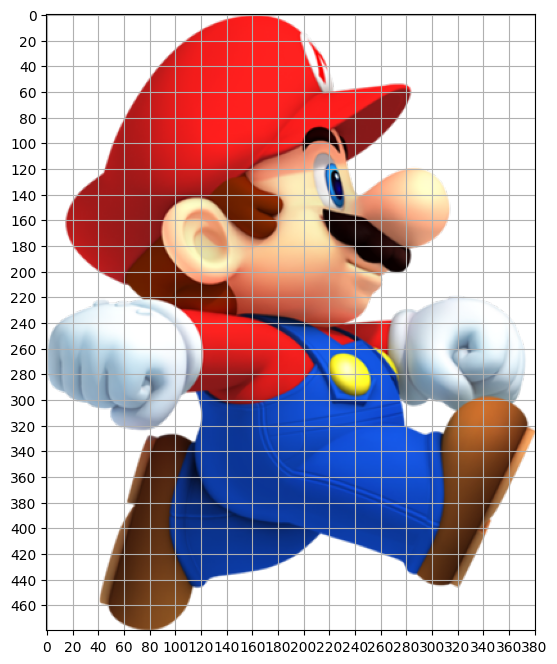

In [63]:
plt.figure(figsize=(8,8))
plt.imshow(mario)
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both')

# Fill this out

In [5]:
hat = mario[60:80,180:200]
dark_hat = mario[80:90, 240:250]
# have kids fill some of this
hair = mario[140:160,140:160]
shoe = mario[340:360,320:340]
armpit = mario[280:300,140:160]
right_arm = mario[240:260,140:160]
left_arm = mario[240:247,240:260]
dress = mario[320:340,180:200]
cheek = mario[180:200,180:200]
white_bg = mario[20:40,20:40]

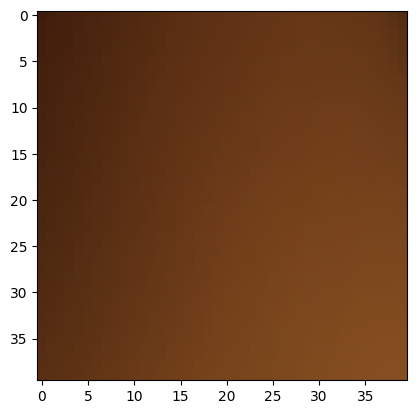

In [136]:
#plot to make sure you actually get the right part
plt.imshow(hat)
plt.imshow(dark_hat)
plt.imshow(armpit)
plt.imshow(right_arm)
plt.imshow(left_arm)

plt.imshow(hair)
plt.imshow(shoe)

In [6]:
# define signal(red cloth/hat) and background(other stuff)
# signal and background is now just an array of shape (npixel, 3)
# this will make you life simpler when you analyze stuff
# print the shape to see what it looks like
def flat(p):
    return p.reshape(-1, p.shape[-1])

signal = np.concatenate((
    flat(hat),
    flat(dark_hat),
    flat(armpit),
    flat(right_arm),
    flat(left_arm)
))[:, :3] # remove the alpha channel

background = np.concatenate((
    flat(hair),
    flat(shoe),
    flat(dress),
    flat(cheek),
    flat(white_bg)
))[:, :3] # remove the alpha channel

print(f"{signal.shape[0]}, {background.shape[0]}")

1440, 2000


5.1.2) Let's make some histogram of how R values differ between his red cloth and the rest.

Once you are done make a plot of B and G as well. I want you to make the following graph. Showing the difference in distribution of R value for signal and background.

![rgb_hist](rgb_hist.png)

Look for: `plt.subplots` and `plt.hist` and figure out what `signal[:,2]` does.

5.1.3) From the graph you made, which color is a good choice for separting his red hat/cloth from the rest? You may be surprised.

### My Answer
Blue as it has the least overlap.

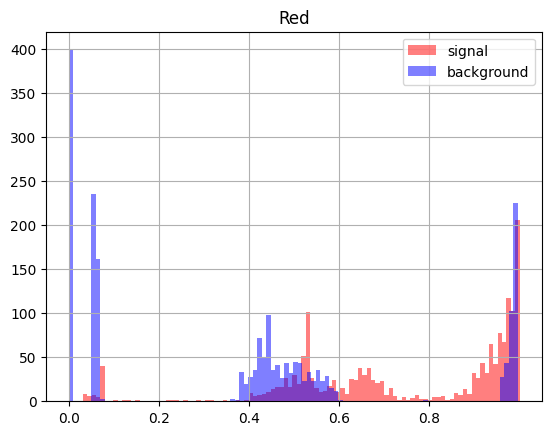

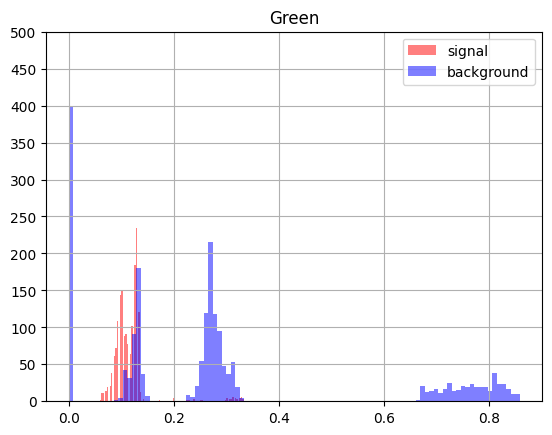

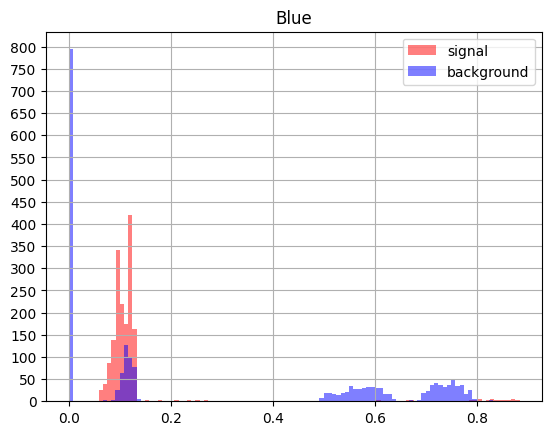

In [68]:
colors = ['Red', 'Green', 'Blue']

for i in range(3):

    plt.hist(signal[:, i], bins=100, color='r', alpha=0.5, label="signal")
    plt.hist(background[:, i], bins=100, color='b', alpha=0.5, label="background")

    plt.title(f"{colors[i]}")
    plt.xticks(np.arange(0,1,0.2))
    match i:
        case 0:
            plt.yticks(range(0,401,50))
        case 1:
            plt.yticks(range(0,501,50))
        case 2:
            plt.yticks(range(0,801,50))
    plt.legend()
    plt.grid()

    plt.show()


5.1.4) We can do better than 1d plot. We can do 2d scatter plot. Make the following plot which show how 2-d distribution of each feature pair (eg: (R,B)) differs between signal and the background.
![rgb_scatter](rgb_scatter.png)

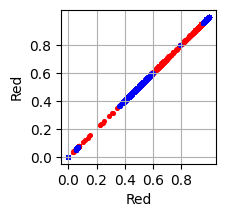

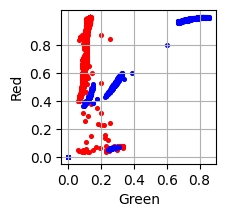

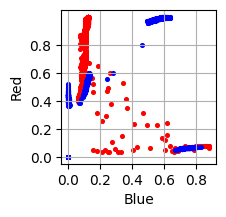

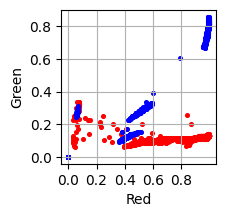

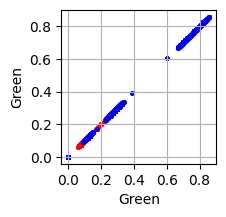

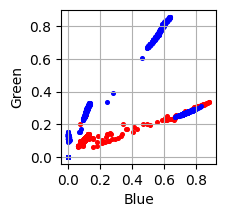

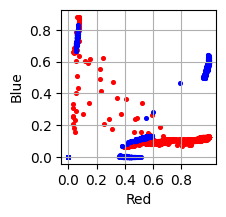

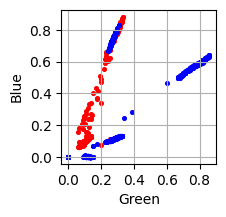

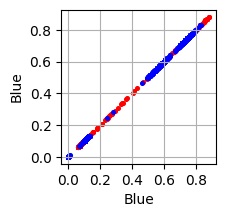

In [69]:
for i in range(3):
    for j in range(3):
            plt.figure(figsize=(2,2))  
            plt.scatter(signal[:, j], signal[:, i], s=7, color='r')
            plt.scatter(background[:, j], background[:, i], s=7, color='b')
        
            plt.xlabel(f"{colors[j]}")
            plt.ylabel(f"{colors[i]}")
            plt.xticks(np.arange(0,1,0.2))
            plt.yticks(np.arange(0,1,0.2))

            plt.grid()
        
            plt.show()

### What we learned so far.


We learned a lot by making the right kind of visualization. We can see clearly that the signal shown in red is clearly seperated from the background(blue). We could in principle end it here by drawing a straight line on (R-G) space which seperate the two. Finding that equation and figure out how to calculate if a point is on the right or on the left of the line. You would even learn a more sophisticated method in Pattern Recognition on how to teach computer to seperate the two groups. But, we will not do it here. 

### Better Color Space

We will make the problem much much easier by using the "right" kind of color space which are different kind of representing color. Some popular ones are(google up if you are interested)
  - RGB which we were using. This representation of color makes sense for computer screen and such since it use red green and blue pixel to represent color
  - CYMK. Ever notice that printer ink are actually not Red Green Blue? They are Cyan, Yellow, Magenta, and blacK? this is used primarily for printing purposes. Printing Graphic Designer goes through a great ordeal to match their screen color(in RGB) with one they will see in printing(CMYK).
  - HSV or HSL. Hue Saturation and Value/Lightness. The is what we are going to be using. It seperate the color(Hue), Saturation and Value. https://en.wikipedia.org/wiki/HSL_and_HSV. This color space closely match on how human perceive color. Typically, it's the right choice when doing image analysis.
  
<img src="HSV_color_solid_cylinder.png" style="height:200px;"/>

5.1.3) **Convert signal and background to hsv.** For this task conver signal array and background array to hsv instead of hsv.
Luckily we do not have to implement the conversion between RGB and HSV since matplotlib already has it for it. See `matplotlib.colors.rgb_to_hsv` and `matplotlib.colors.hsv_to_rgb`.

The answer should be one line each for signal_hsv and background_hsv. Read up the manual

In [7]:
import matplotlib
signal_hsv = matplotlib.colors.rgb_to_hsv(signal)
background_hsv =  matplotlib.colors.rgb_to_hsv(background)

5.1.4) Let's make the histogram to see how Hue, Saturation, and Value are distributed differently among signal and background.

![hsv_hist](hsv_hist.png)

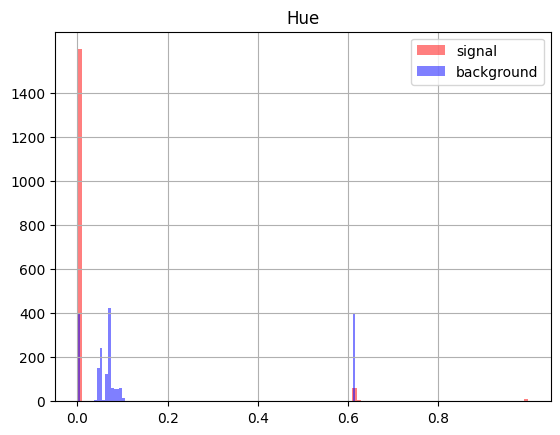

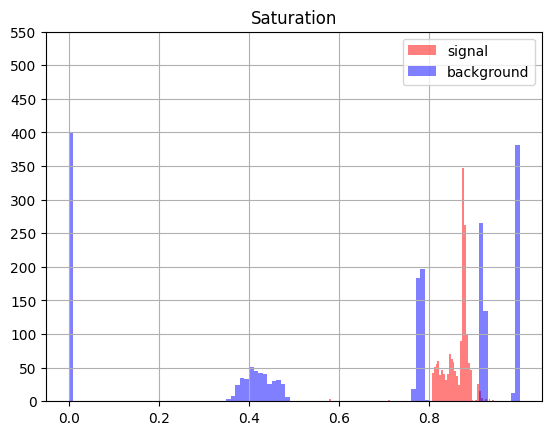

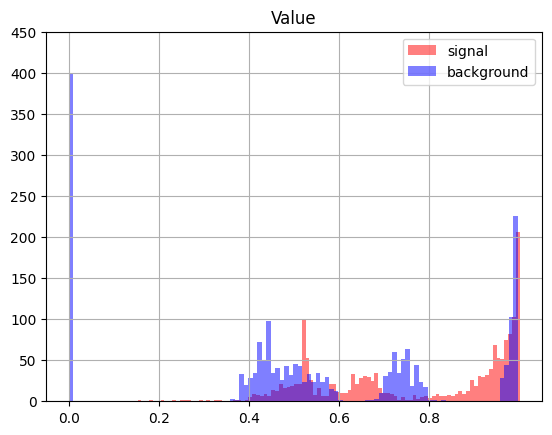

In [72]:
foo = ['Hue', 'Saturation', 'Value']

for i in range(3):

    plt.hist(signal_hsv[:, i], bins=100, color='r', alpha=0.5, label="signal")
    plt.hist(background_hsv[:, i], bins=100, color='b', alpha=0.5, label="background")

    plt.title(f"{foo[i]}")
    plt.xticks(np.arange(0,1,0.2))
    
    match i:
        case 0:
            plt.yticks(range(0,1600,200))
        case 1:
            plt.yticks(range(0,600,50))
        case 2:
            plt.yticks(range(0,500,50))
    plt.legend()
    plt.grid()

    plt.show()

5.1.5) While we are at it let's make a 2-D scatter plot. Like this one
![hsv_scatter](hsv_scatter.png)

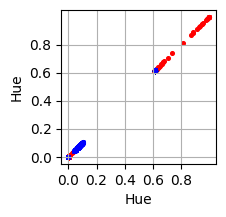

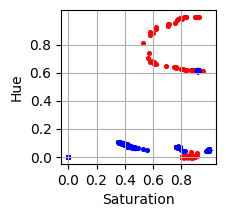

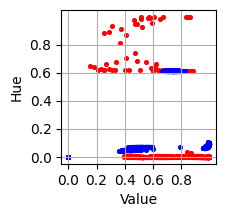

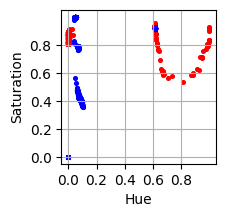

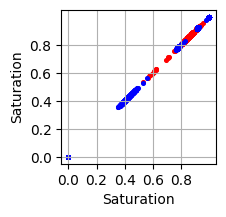

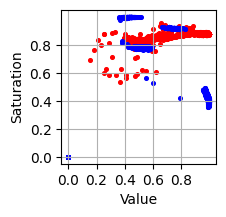

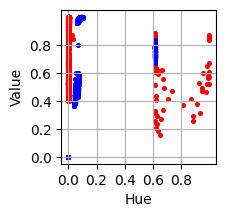

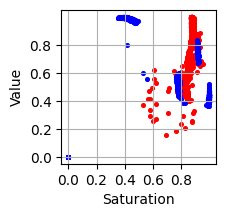

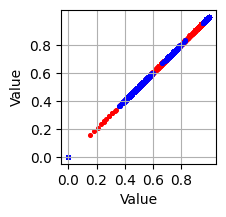

In [73]:
for i in range(3):
    for j in range(3):
            plt.figure(figsize=(2,2))  
            plt.scatter(signal_hsv[:, j], signal_hsv[:, i], s=7, color='r')
            plt.scatter(background_hsv[:, j], background_hsv[:, i], s=7, color='b')
        
            plt.xlabel(f"{foo[j]}")
            plt.ylabel(f"{foo[i]}")
            plt.xticks(np.arange(0,1,0.2))
            plt.yticks(np.arange(0,1,0.2))

            plt.grid()
        
            plt.show()

5.1.6) There is one technical difficulty. You may notice some points at $h=1.0$. 

The hue value is essentially the angle so it wraps around. This means that 0 is actully close to 1.

<img src="HSV_color_solid_cylinder.png" style="width:200px"/>

Your job for this one is to write a function called `hue_distance(h1, h2)` to calculate how far the two hues are given the fact that it wraps around.

Do not think too much it's just one `if`.

 - `hue_distance(1.0,0.0) == 0.0`
 - `hue_distance(0.0,0.2) == 0.0`
 - `hue_distance(0.5,0.2) == 0.3`

In [93]:
def hue_distance(h1, h2):
    loops = [0.0, 1.0]
    if h1 in loops or h2 in loops:
        return 0.0
    else:
        return max(h1, h2) - min(h1, h2)

5.1.7) Use what you learned from HSV plots and find write a code that seperate the red hat/cloth and the rest. Zoom in the plots you made if needed. If there are regions that doesn't work as you expect add it to the sample and modify your condition rinse and repeat.

With the two plots I managed to get this
<img src="mask.png"/>

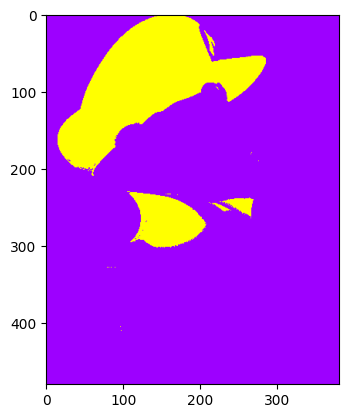

In [23]:
#### red hues 
import pprint as pp

hue_lim = 1e-3
sat_lim = 0.5
val_lim = 0.25

mario_hsv = matplotlib.colors.rgb_to_hsv(mario[..., :3])

def mask(hsv, htol, stol, vtol, targetH):

    hsv_expanded = np.expand_dims(hsv, axis=2)
    target_expanded = np.expand_dims(np.expand_dims(targetH, axis=0), axis=0)
    
    diff = abs(hsv_expanded - target_expanded)
    
    h_mask = diff[..., 0] <= htol
    s_mask = diff[..., 1] <= stol
    v_mask = diff[..., 2] <= vtol
    
    combined_mask = np.any(h_mask & s_mask & v_mask, axis=2)
    return combined_mask

signal_mask = mask(mario_hsv, hue_lim, sat_lim, val_lim, signal_hsv)

mario_hsv[signal_mask] = [60/360, 1.0, 1.0]  # yellow  
mario_hsv[~signal_mask] = [277/360, 1.0, 1.0] # purple

new_image = matplotlib.colors.hsv_to_rgb(mario_hsv)

plt.imshow(new_image)

### 5.2) Changing Color Without Chaning The Shade

Now that we can detect Mario's cloth. All we need to do now is to change the color of his cloth to "green" ish. This means that all we need to do is to change the hue value from red hue to green hue.

The hue value can be found below. Make sure you divide it by 360 to get it to 0-1 range that matplotlib expect.

<img src="YOBFy.png" style="height:50px"/>

***Your task*** Make `luigi.png`

<img src="luigi.png" style="height:100px"/>

Hint:
  - You will want to convert hsv back to rgb and pad the original alpha backin so you can display it nicely with `imshow`
  - `matplotlib.colors.hsv_to_rgb` is handy.
  - you can copy nparray with `nparray.copy()`
  - if you want a darker shade scale `value` component down a little bit.




### 

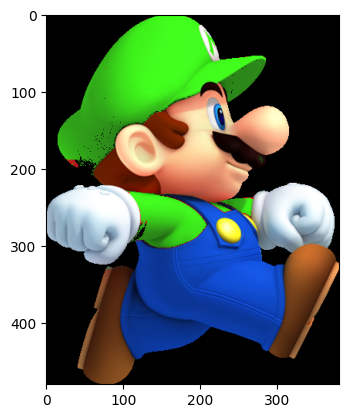

In [26]:
luigi_hsv = matplotlib.colors.rgb_to_hsv(mario[..., :3])

# altering the bounds a bit 
hue_lim = 1e-2
sat_lim = 0.5
val_lim = 0.2

signal_mask = mask(luigi_hsv, hue_lim, sat_lim, val_lim, signal_hsv)
luigi_hsv[signal_mask, 0] += 110/360  # shift to green

new_image = matplotlib.colors.hsv_to_rgb(luigi_hsv)

plt.imshow(new_image)